# Fitzpatrick 17K Dataset 

1. **Title: Evaluating deep neural networks trained on clinical images in dermatology with the fitzpatrick 17k dataset**
   - **Authors:** Matthew Groh, Caleb Harris, Luis Soenksen, Felix Lau, Rachel Han, Aerin Kim, Arash Koochek, Omar Badri
   - **Conference:** Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition (CVPR)
   - **Year:** 2021
   - **Pages:** 1820-1828
   
2. **Title: Towards transparency in dermatology image datasets with skin tone annotations by experts, crowds, and an algorithm**
   - **Authors:** Matthew Groh, Caleb Harris, Roxana Daneshjou, Omar Badri, Arash Koochek
   - **Journal:** arXiv preprint arXiv:2207.02942
   - **Year:** 2022

## Initial Exploratory Data Analysis 

In [2]:
# Declaring necessary libraries:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

We will use pandas since the file is not too large and a dataframe will allow us to perform the initial exploration.

In [3]:
# Opening the csv file:

raw_data_df = pd.read_csv('fitzpatrick17k.csv')
raw_data_df

,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,nine_partition_label,three_partition_label,qc,url,url_alphanum
0,5e82a45bc5d78bd24ae9202d194423f8,3,3,drug induced pigmentary changes,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicmminoc...
1,fa2911a9b13b6f8af79cb700937cc14f,1,1,photodermatoses,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicpphoto...
2,d2bac3c9e4499032ca8e9b07c7d3bc40,2,3,dermatofibroma,benign dermal,benign,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicdderma...
3,0a94359e7eaacd7178e06b2823777789,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...
4,a39ec3b1f22c08a421fa20535e037bba,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...
...,...,...,...,...,...,...,...,...,...
16572,cd90e491ddaa92f0f4eb07f73aa09f64,5,5,scleroderma,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=4529,httpwwwatlasdermatologicocombrimgimageId4529.jpg
16573,5f1ed6de6a9110d7dc580a6a0312af63,4,5,pityriasis rosea,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=5630,httpwwwatlasdermatologicocombrimgimageId5630.jpg
16574,f198aaf1f0550c2464b285454d34926e,3,3,myiasis,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=4609,httpwwwatlasdermatologicocombrimgimageId4609.jpg
16575,6214de2e915835014235a1839cbc5938,-1,5,vitiligo,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=7930,httpwwwatlasdermatologicocombrimgimageId7930.jpg


In [7]:
# Lowercase text in relevant columns:
columns_to_lower = [
    'label', 
    'nine_partition_label', 
    'three_partition_label', 
    'qc', 
    'url_alphanum'
]

for column in columns_to_lower:
    raw_data_df[column] = raw_data_df[column].apply(lambda x: x.lower())

## Data cleaning

In [17]:
columns_to_keep = [
    'md5hash', 
    'fitzpatrick_scale', 
    'fitzpatrick_centaur', 
    'label', 
    'nine_partition_label', 
    'three_partition_label', 
    'qc']
cleaned_df = raw_data_df[columns_to_keep].copy()
cleaned_df.head(1)

,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,nine_partition_label,three_partition_label,qc
0,5e82a45bc5d78bd24ae9202d194423f8,3,3,drug induced pigmentary changes,inflammatory,non-neoplastic,NaN


### Understanding the labels through insights from the documentation

The Fitzpatrick 17k dataset contains 16,577 clinical images with skin condition labels and skin type labels based
on the Fitzpatrick scoring system [25]. 

The dataset is accessible at https://github.com/mattgroh/fitzpatrick17k.

The images are sourced from two online open-source dermatology atlases: 12,672 images from DermaAmin and 3,905 images from Atlas Dermatologico [4, 26]. These sources include images and their corresponding skin condition label. While these labels are not known to be confirmed by a biopsy, these images and their skin condition labels
have been used and cited in dermatology and computer vision literature a number of times. See citations here: https://arxiv.org/pdf/2104.09957.pdf .

**Data Quality**

As stated by Aerin Kim Scale et all: As a data quality check, we asked a board-certified dermatologist to evaluate the diagnostic accuracy of 3% of the dataset. Based on a random sample of 504 images, a board-certified dermatologist identified 69.0% of images
as diagnostic of the labeled condition, 19.2% of images as potentially diagnostic (not clearly diagnostic but not
necessarily mislabeled, further testing would be required), 6.3% as characteristic (resembling the appearance of such a condition but not clearly diagnostic), 3.4% are considered wrongly labeled, and 2.0% are labeled as other. 

### Glossary of column names


- md5hash: This is a unique identifier representing the MD5 hash of the data.

- fitzpatrick_scale: Numerical six-point scale originally developed for classifying sun reactivity of skin and adjusting clinical medicine according to skin phenotype

- fitzpatrick_centaur: Another numerical scale, possibly related to the Fitzpatrick scale.

- label: This column appears to represent a categorical label for a specific condition or characteristic. In this case, the label is "drug-induced pigmentary changes," suggesting changes in skin pigmentation due to drug use.

- nine_partition_label: This column contains string labels representing the second level of granularity from skin condition categorization. In this case: inflammatory, malignant epidermal, genodermatoses, benign dermal, benign epidermal, malignant melanoma, benign melanocyte, malignant cutaneous lymphoma, and malignant dermal.

- three_partition_label: This column contains string labels representing the first level of granularity from skin condition categorization. In this case: "Non-Neoplastic", "Benign", and "Malignant"

- qc: Classification of diagnosis quality assurance according to a thermatologist providing subject matter expertise 

- url: This column contains a URL, which references the source image belonging to the record.

- url_alphanum: A processed or modified version of the previous URL.

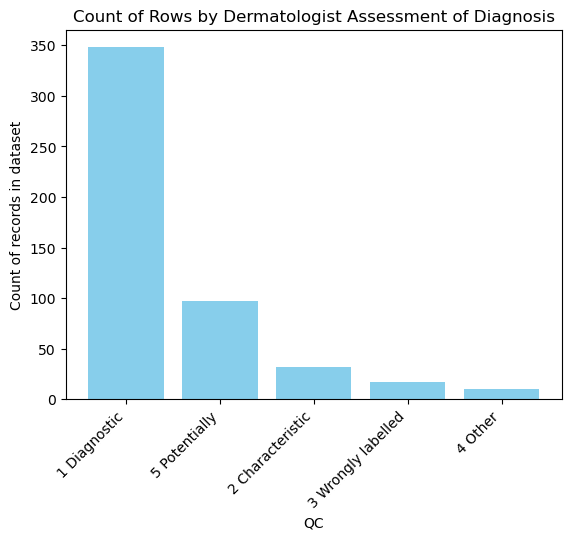

In [18]:
qc_counts = cleaned_df['qc'].value_counts()

# Plotting the bar chart
plt.bar(qc_counts.index, qc_counts.values, color='skyblue')
plt.title('Count of Rows by Dermatologist Assessment of Diagnosis')
plt.xlabel('QC')
plt.ylabel('Count of records in dataset')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

**Diagnosis quality check by percentage**

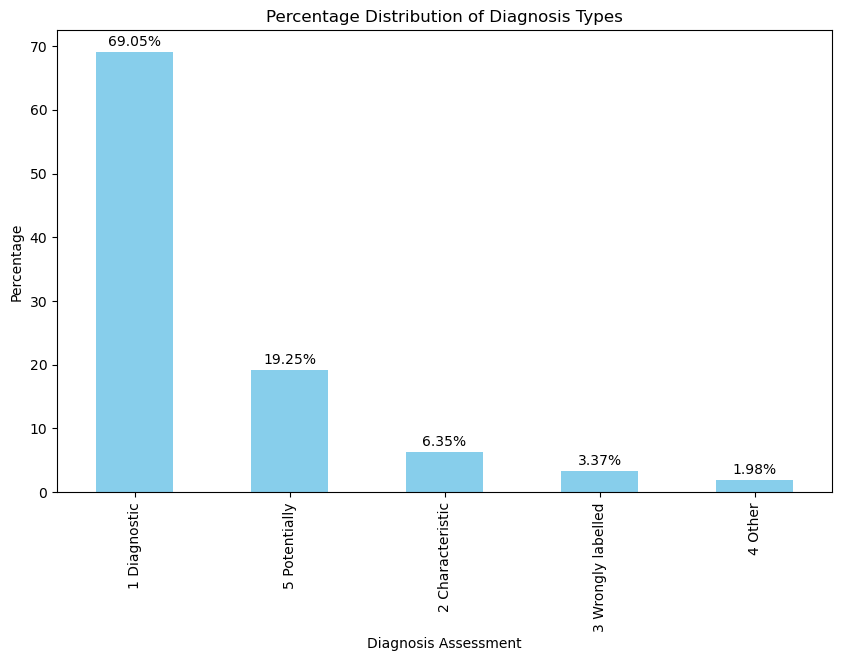

In [19]:
# Diagnosis by percentage:

qc_percentage = cleaned_df['qc'].value_counts(normalize=True) * 100

# Plotting the bar chart
plt.figure(figsize=(10, 6))
qc_percentage.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Diagnosis Assessment')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Diagnosis Types')

# Display the percentage values on top of the bars
for index, value in enumerate(qc_percentage):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

As stated in the paper https://arxiv.org/pdf/2104.09957.pdf, based on a random sample of 504 images, a board-certified dermatologist identified 69.0% of images as diagnostic of the labeled condition, 19.2% of images as potentially diagnostic (not clearly diagnostic but not
necessarily mislabeled, further testing would be required), 6.3% as characteristic (resembling the appearance of such a condition but not clearly diagnostic), 3.4% are considered wrongly labeled, and 2.0% are labeled as other.

In [20]:
# Counting records assessed by board-certified dermatologist to corroborate:
images_reviewed = cleaned_df['qc'].count()
print('number of images reviewed by board-certified thermatologist present in this dataset:', images_reviewed)

number of images reviewed by board-certified thermatologist present in this dataset: 504


### Exploring skin conditions by granularity level

#### Level 1

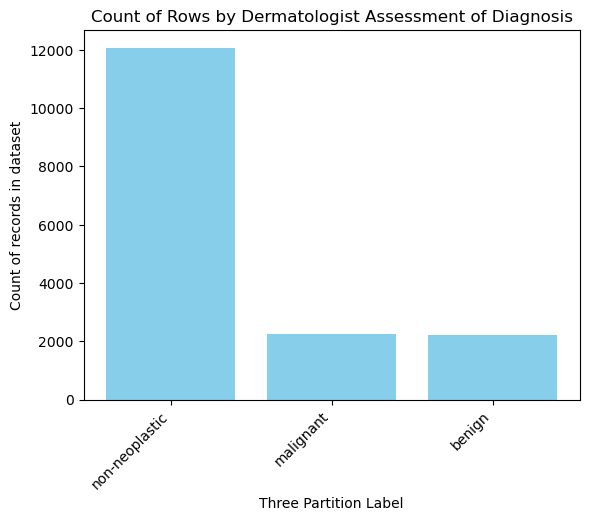

In [21]:
three_partition_counts = cleaned_df['three_partition_label'].value_counts()

# Plotting the bar chart
plt.bar(three_partition_counts.index, three_partition_counts.values, color='skyblue')
plt.title('Count of Rows by partition label')
plt.xlabel('Three Partition Label')
plt.ylabel('Count of records in dataset')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

**Level 2**

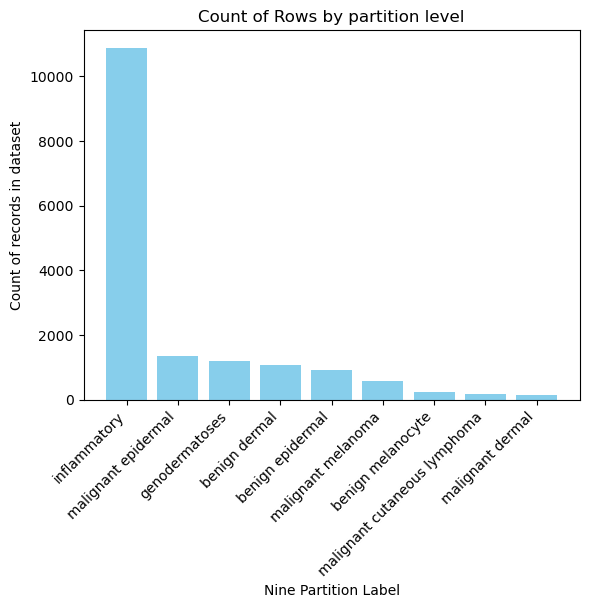

In [23]:
# Getting records for second level of granularity
nine_partition_counts = cleaned_df['nine_partition_label'].value_counts()

# Plotting the bar chart
plt.bar(nine_partition_counts.index, nine_partition_counts.values, color='skyblue')
plt.title('Count of Rows by partition level')
plt.xlabel('Nine Partition Label')
plt.ylabel('Count of records in dataset')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

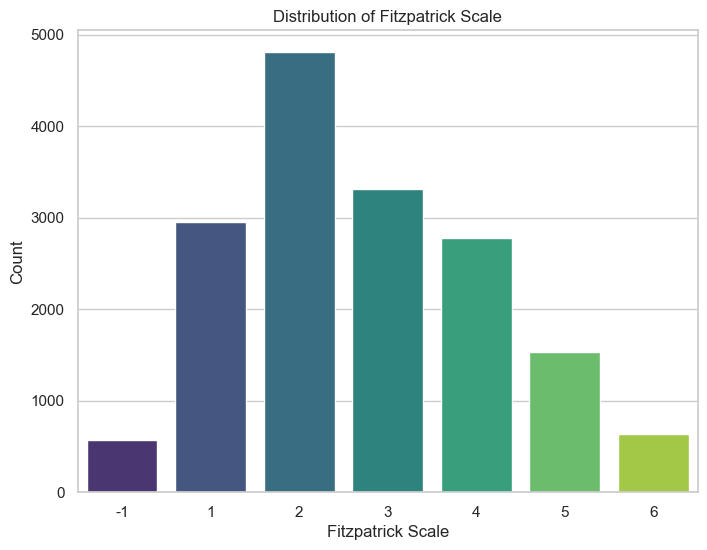

In [25]:
sns.set(style="whitegrid")  # Set the style for the plot

# Create a bar plot for the distribution of Fitzpatrick scale
plt.figure(figsize=(8, 6))  # Set the size of the plot

# Assuming 'fitzpatrick_scale' is the column in your DataFrame
sns.countplot(x='fitzpatrick_scale', data=cleaned_df, palette='viridis')

plt.title('Distribution of Fitzpatrick Scale')
plt.xlabel('Fitzpatrick Scale')
plt.ylabel('Count')

plt.show()

Type "-1" in the context of this dataset means "unknown" or not labeled. 

**Insights from the EDA:**

- Training a model to classify skin conditions based on the Fitzpatrick skin condition labelling system might not be reliable.
- As stated in (Aerin et all 2021), "In the random holdout, the model produces a 20.2% overall accuracy on exactly identifying the labeled skin condition present in the image."

The Fitzpatrick 17k dataset was also used to compare Fitzpatrick skin type labels to a computational method for estimating skin tone: individual typology angle (ITA). 

- ITA is promising because it can be computed directly from images. 
- Its performance varies with lighting conditions and may not always be effective for accurately annotating clinical images with skin types.

In [28]:
from ydata_profiling import ProfileReport

profile = ProfileReport(cleaned_df, title="Fitzpatrick Profiling Report", explorative=True)

# Save the report to an HTML file
profile.to_file("fitzpatrick_profiling_report.html")

# Display the report in Jupyter Notebook
profile.to_notebook_iframe()

/Users/carlosvarela/anaconda3/envs/final_project/lib/python3.11/site-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]